In [6]:
# Exercice 1 :

from google.colab import drive
drive.mount('/content/drive')



import pandas as pd

file_path = '/content/drive/My Drive/Datasets/train.csv'
df = pd.read_csv(file_path)
df.head()


Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

# Les lignes dupliquées:

# Renvoie un DataFrame avec uniquement les lignes dupliquées
duplicates = df[df.duplicated()]

# Nombre de lignes dupliquées
print(f"Nombre de lignes dupliquées : {duplicates.shape[0]}")

# (Facultatif) Afficher les lignes dupliquées
print(duplicates.head())


Nombre de lignes dupliquées : 0
Empty DataFrame
Columns: [STATIONS_ID;MESS_DATUM;QN_3;  FX;  FM;QN_4; RSK;RSKF; SDK;SHK_TAG;  NM; VPM;  PM; TMK; UPM; TXK; TNK; TGK;eor]
Index: []


In [ ]:

# Nombre de lignes AVANT suppression
rows_before = df.shape[0]

# Supprimer les lignes dupliquées
df_cleaned = df.drop_duplicates()

# Nombre de lignes APRÈS suppression
rows_after = df_cleaned.shape[0]

# Afficher la comparaison
print(f"Nombre de lignes avant suppression : {rows_before}")
print(f"Nombre de lignes après suppression : {rows_after}")
print(f"Nombre de doublons supprimés : {rows_before - rows_after}")



Nombre de lignes avant suppression : 25051
Nombre de lignes après suppression : 25051
Nombre de doublons supprimés : 0


In [ ]:
# Exercise 2: Handling Missing Values


# step 1:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Datasets/train.csv'
df = pd.read_csv(file_path)
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

# Afficher les colonnes avec des valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# step 2:



# step 3:

#Age        19.87% ==> remplacement par la mediane
#Cabin      77.10% ==> suppression
#Embarked    0.22% ==>

# Supprimer une colonne spécifique (ex : Cabin)
if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])

# Remplacement des valeurs vides de âge par la mediane:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# Transforme la colonne Age et remplace les NaN par la médiane
df[['Age']] = imputer.fit_transform(df[['Age']])


# Remplacer les valeurs manquantes de 'Embarked' par la valeur la plus fréquente
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Vérification des colonnes avec des valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])




Series([], dtype: int64)


In [9]:
# Exercice 3

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Création du DataFrame
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Datasets/train.csv'
df = pd.read_csv(file_path)


# 1. Création de la feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# 2. Extraction du titre depuis le nom
def extract_title(name):
    if pd.isnull(name):
        return 'Unknown'
    # Rechercher le titre dans le nom
    import re
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return 'Unknown'
df['Title'] = df['Name'].apply(extract_title)
# 3. Encodage des variables catégoriques
# Sex (nominal) avec LabelEncoder
le_sex = LabelEncoder()
df['Sex_encoded'] = le_sex.fit_transform(df['Sex'])
# Title (nominal) avec one-hot encoding
title_dummies = pd.get_dummies(df['Title'], prefix='Title')
# Embarked (nominal) avec one-hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
# 4. Normalisation ou standardisation des features numériques (ex : Age, Fare, FamilySize)
scaler = StandardScaler()
numeric_features = ['Age', 'Fare', 'FamilySize']
df[numeric_features] = scaler.fit_transform(df[numeric_features])
# 5. Intégration des variables encodées
df = pd.concat([df, title_dummies, embarked_dummies], axis=1)
# 6. Suppression des colonnes d'origine si nécessaire
df.drop(['Name', 'Sex', 'Title', 'Embarked', 'SibSp', 'Parch'], axis=1, inplace=True)
# Affichage du DataFrame final
print(df)








Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     PassengerId  Survived  Pclass       Age            Ticket      Fare  \
0              1         0       3 -0.530377         A/5 21171 -0.502445   
1              2         1       1  0.571831          PC 17599  0.786845   
2              3         1       3 -0.254825  STON/O2. 3101282 -0.488854   
3              4         1       1  0.365167            113803  0.420730   
4              5         0       3  0.365167            373450 -0.486337   
..           ...       ...     ...       ...               ...       ...   
886          887         0       2 -0.185937            211536 -0.386671   
887          888         1       1 -0.737041            112053 -0.044381   
888          889         0       3       NaN        W./C. 6607 -0.176263   
889          890         1       1 -0.254825            111369 -0.044381   
890          891         0       3 

In [10]:
# Exercice 4


import pandas as pd
import numpy as np
# Fonction pour détecter et capper les outliers avec l'IQR
def traiter_outliers_iqr(df, colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    # Définir les bornes
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR
    # Visualiser le nombre d'outliers
    outliers = df[(df[colonne] < borne_inferieure) | (df[colonne] > borne_superieure)]
    print(f"{colonne} - Outliers détectés : {len(outliers)}")
    # Option 1 : Capping (limiter les valeurs extrêmes)
    df[colonne] = np.where(df[colonne] < borne_inferieure, borne_inferieure,
                            np.where(df[colonne] > borne_superieure, borne_superieure, df[colonne]))
    return df
# Appliquer la fonction pour 'Fare' et 'Age'
df = traiter_outliers_iqr(df, 'Fare')
df = traiter_outliers_iqr(df, 'Age')

Fare - Outliers détectés : 116
Age - Outliers détectés : 11


In [11]:
from scipy import stats
# Détection avec Z-score
def traiter_outliers_zscore(df, colonne, seuil=3):
    z_scores = stats.zscore(df[colonne])
    outliers = np.where(np.abs(z_scores) > seuil)
    print(f"{colonne} - Outliers détectés : {len(outliers[0])}")
    # Ici, vous pouvez choisir de supprimer ou de remplacer
    # Exemple : remplacer par la moyenne
    moyenne = df[colonne].mean()
    df[colonne] = np.where(np.abs(z_scores) > seuil, moyenne, df[colonne])
    return df
# Affichage
df = traiter_outliers_zscore(df, 'Fare')
df = traiter_outliers_zscore(df, 'Age')

Fare - Outliers détectés : 0
Age - Outliers détectés : 0


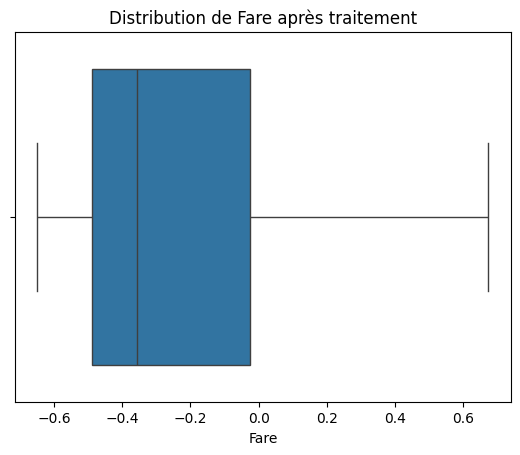

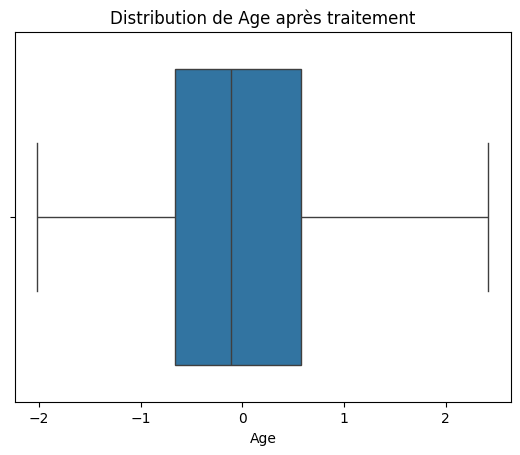

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation avant/après (si vous avez conservé les données originales)
sns.boxplot(x=df['Fare'])
plt.title('Distribution de Fare après traitement')
plt.show()
sns.boxplot(x=df['Age'])
plt.title('Distribution de Age après traitement')
plt.show()

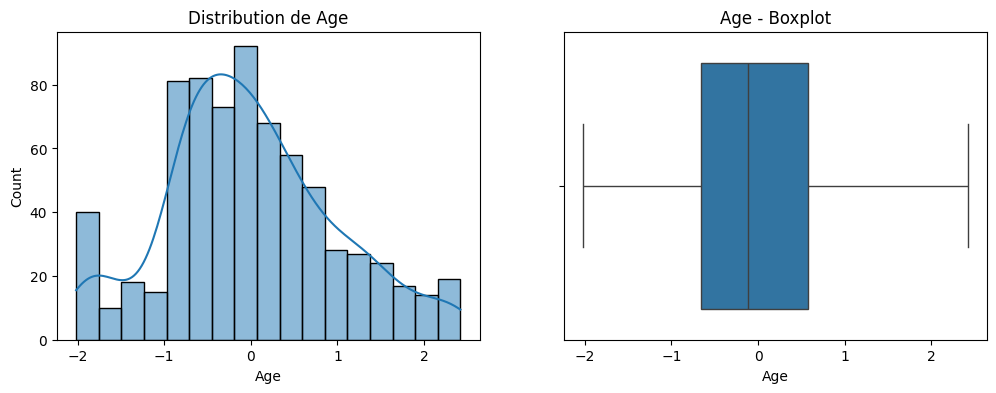

Statistiques pour Age :
count    714.000000
mean      -0.005264
std        0.986246
min       -2.016979
25%       -0.659542
50%       -0.117049
75%        0.571831
max        2.418890
Name: Age, dtype: float64




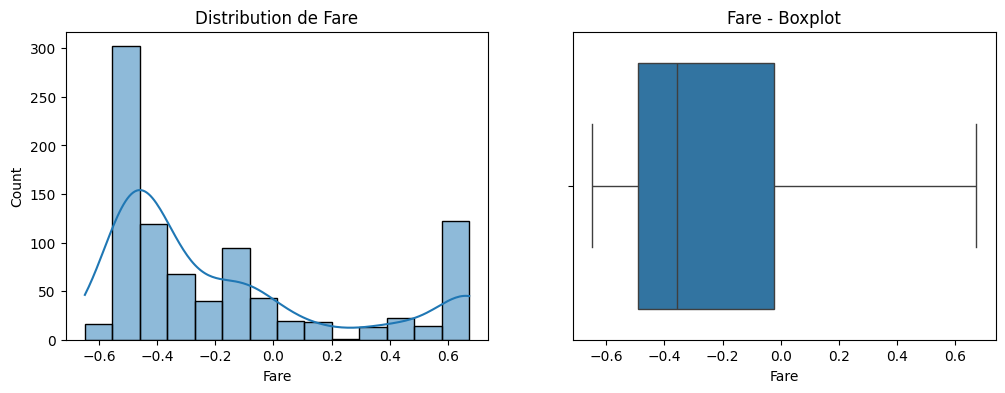

Statistiques pour Fare :
count    891.000000
mean      -0.164247
std        0.412391
min       -0.648422
25%       -0.489148
50%       -0.357391
75%       -0.024246
max        0.673106
Name: Fare, dtype: float64




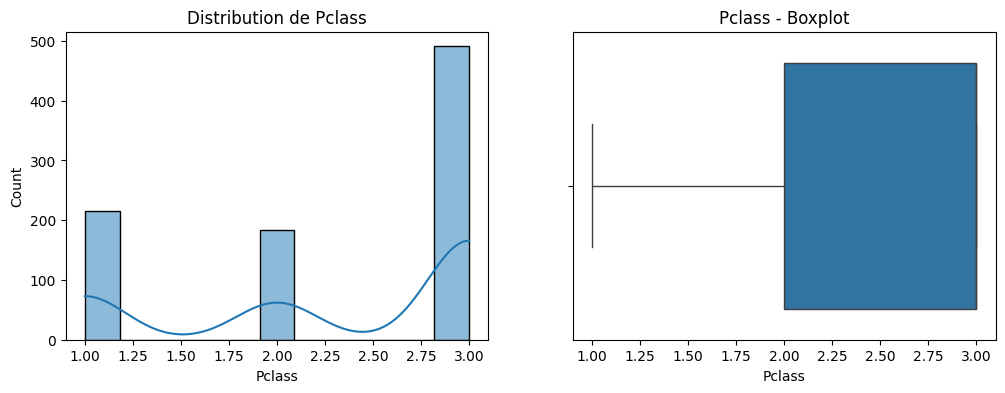

Statistiques pour Pclass :
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64




In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Liste des colonnes numériques à analyser
colonnes_numeriques = ['Age', 'Fare', 'Pclass']
for col in colonnes_numeriques:
    plt.figure(figsize=(12, 4))
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.show()
    # Statistiques descriptives
    print(f"Statistiques pour {col} :")
    print(df[col].describe())
    print("\n")

In [16]:
# EXERCICE 6
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Création du DataFrame

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

file_path = '/content/drive/My Drive/Datasets/train.csv'
df = pd.read_csv(file_path)
df.head()




# Identification des colonnes catégoriques
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Suppose que 'Sex' et 'Embarked' sont nominales (nominales = non ordinales)
nominal_cols = ['Sex', 'Embarked']
# Encodage de 'Sex' avec LabelEncoder
le_sex = LabelEncoder()
df['Sex_encoded'] = le_sex.fit_transform(df['Sex'])
# Encodage de 'Embarked' avec one-hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
# Intégration des variables encodées dans le DataFrame principal
df = pd.concat([df, embarked_dummies], axis=1)
# Suppression des colonnes originales
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
# Affichage pour vérification
print(df)







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                       

In [17]:
# Exercice 7
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

file_path = '/content/drive/My Drive/Datasets/train.csv'
df = pd.read_csv(file_path)
df.head()


# Définir les bins pour la colonne Age (par exemple : 0-10, 11-20, 21-30, 31-40, 41+)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
# Créer une nouvelle colonne "AgeGroup" avec pd.cut()
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Appliquer le one-hot encoding sur la colonne "AgeGroup"
age_dummies = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')
# Intégrer ces nouvelles colonnes dans le DataFrame principal
df = pd.concat([df, age_dummies], axis=1)
# Optionnel : supprimer la colonne "AgeGroup" si vous souhaitez uniquement les variables numériques
# df.drop('AgeGroup', axis=1, inplace=True)
# Affichage pour vérification
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                  